In [1]:
# Import packages

import numpy as np
import pandas as pd
import gc
from nlb_tools.nwb_interface import NWBDataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data

gc.collect()
dataset = NWBDataset("../Data/000128/sub-Jenkins/", "*train", split_heldout=False)

In [3]:
# Read the data

dataset.data

signal_type             cursor_pos            eye_pos           hand_pos  \
channel                          x          y       x      y           x   
clock_time                                                                 
0 days 00:00:00          -0.900000  -5.700000     7.2    2.0   -0.714908   
0 days 00:00:00.001000   -0.907457  -5.687027     7.2    2.1   -0.717532   
0 days 00:00:00.002000   -0.912768  -5.672115     7.6    1.2   -0.720323   
0 days 00:00:00.003000   -0.914050  -5.653433     7.4    1.4   -0.723278   
0 days 00:00:00.004000   -0.909980  -5.629617     7.4    3.6   -0.726362   
...                            ...        ...     ...    ...         ...   
0 days 01:55:52.296000 -114.378901 -79.712313   -95.0 -117.5 -114.334012   
0 days 01:55:52.297000 -114.366164 -79.728485   -94.9 -117.4 -114.333252   
0 days 01:55:52.298000 -114.365911 -79.749577   -94.6 -117.7 -114.332816   
0 days 01:55:52.299000 -114.378419 -79.774473   -94.8 -117.7 -114.332814   
0 days 01:55:52.300000 -114.400000 -79.800000   -97.8 -118.2 -114.333242   

signal_type                         hand_vel            spikes       ...       \
channel                          y         x          y   1011 1021  ... 2861   
clock_time                                                           ...        
0 days 00:00:00         -40.526123 -2.624567  29.977111    0.0  0.0  ...  0.0   
0 days 00:00:00.001000  -40.496146 -2.707321  30.577662    0.0  0.0  ...  0.0   
0 days 00:00:00.002000  -40.464968 -2.872729  31.744164    0.0  0.0  ...  0.0   
0 days 00:00:00.003000  -40.432658 -3.019660  32.847931    0.0  0.0  ...  0.0   
0 days 00:00:00.004000  -40.399272 -3.059403  33.895227    0.0  0.0  ...  0.0   
...                            ...       ...        ...    ...  ...  ...  ...   
0 days 01:55:52.296000 -114.809976  0.905895  -0.883716    0.0  0.0  ...  0.0   
0 days 01:55:52.297000 -114.810622  0.598148  -0.420075    0.0  0.0  ...  0.0   
0 days 01:55:52.298000 -114.810816  0.218816   0.012961    0.0  0.0  ...  0.0   
0 days 01:55:52.299000 -114.810596 -0.212940   0.393580    0.0  0.0  ...  0.0   
0 days 01:55:52.300000 -114.810029 -0.427820   0.566803    0.0  0.0  ...  0.0   

signal_type                                                          
channel                2862 2871 2881 2882 2911 2931 2941 2951 2961  
clock_time                                                           
0 days 00:00:00         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.001000  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0 days 00:00:00.002000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.003000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.004000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  
0 days 01:55:52.296000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.297000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.298000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.299000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:55:52.300000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[6952301 rows x 190 columns]

In [8]:
# Check the time bins

dataset.bin_width

5

In [9]:
# Check the trial information

dataset.trial_info

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split
0,0,0 days 00:00:00,0 days 00:00:03.321000,25,2,84,True,0 days 00:00:00.880000,0 days 00:00:01.478000,0 days 00:00:01.905000,427,598,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val
1,1,0 days 00:00:03.400000,0 days 00:00:06.521000,3,1,3,True,0 days 00:00:04.291000,0 days 00:00:04.739000,0 days 00:00:05.280000,541,448,1,"[[-116, -5]]",6,"[[-69, -16, 13, 69], [-120, -62, 83, 15], [95,...",0,val
2,2,0 days 00:00:06.600000,0 days 00:00:09.856000,22,1,66,True,0 days 00:00:07.471000,0 days 00:00:07.969000,0 days 00:00:08.346000,377,498,1,"[[-82, -86]]",9,"[[34, -41, 86, 8], [9, -42, 33, 19], [7, -41, ...",0,train
3,3,0 days 00:00:09.900000,0 days 00:00:12.946000,29,2,100,True,0 days 00:00:10.853000,0 days 00:00:11.335000,0 days 00:00:11.752000,417,482,3,"[[-109, 2], [2, 82], [132, -65]]",9,"[[-9, 52, 43, 8], [-50, 91, 14, 64], [-133, -5...",1,train
4,4,0 days 00:00:13,0 days 00:00:15.481000,21,0,65,True,0 days 00:00:13.687000,0 days 00:00:14.235000,0 days 00:00:14.507000,272,548,1,"[[27, 82]]",0,[],0,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,2290,0 days 01:55:36.600000,0 days 01:55:39.796000,34,1,91,True,0 days 01:55:37.362000,0 days 01:55:38.277000,0 days 01:55:38.585000,308,915,1,"[[116, -77]]",7,"[[66, -43, 30, 9], [-66, 1, 11, 70], [-35, 50,...",0,train
2291,2291,0 days 01:55:39.900000,0 days 01:55:42.736000,15,1,75,True,0 days 01:55:40.717000,0 days 01:55:41.265000,0 days 01:55:41.641000,376,548,1,"[[133, -81]]",9,"[[-33, 47, 37, 6], [-77, 48, 61, 11], [-64, -2...",0,train
2292,2292,0 days 01:55:42.800000,0 days 01:55:45.766000,23,0,67,True,0 days 01:55:43.465000,0 days 01:55:44.396000,0 days 01:55:44.714000,318,931,1,"[[94, -86]]",0,[],0,train
2293,2293,0 days 01:55:45.800000,0 days 01:55:49.201000,25,2,84,True,0 days 01:55:46.631000,0 days 01:55:46.663000,0 days 01:55:47.616000,953,32,3,"[[-111, -82], [-108, 81], [118, 72]]",8,"[[69, 31, 14, 99], [69, 54, 5, 101], [-62, -48...",2,val


In [10]:
# Check data description

dataset.descriptions

{'start_time': 'Start time of epoch, in seconds',
 'stop_time': 'Stop time of epoch, in seconds',
 'trial_type': 'A number representing the maze that was used for the trial',
 'trial_version': 'A number 0-2 indicating which variant of the maze is presented. 0 is 1-target no-barrier, 1 is 1-target with barriers, 2 is 3-target with barriers',
 'maze_id': 'A unique identifier for each maze, lumping all 3 `trial_version`s. `trial_type` is not unique across datasets, but `maze_id` is',
 'success': 'If the monkey was successful on the trial. In these benchmark files, all unsuccessful trials have been removed',
 'target_on_time': 'Time of target presentation, as detected by the photobox',
 'go_cue_time': 'Time of go cue delivery, as detected by the photobox',
 'move_onset_time': 'Time of movement onset, calculated offline using a robust algorithm',
 'rt': 'Delay between go cue and movement onset',
 'delay': 'Delay between target presentation and go cue, in ms',
 'num_targets': 'The number of 

In [7]:
# resample time bins from 1ms to 5ms

dataset.resample(5)

In [11]:
# make trial dataset

dataset.make_trial_data()

align_time             clock_time  cursor_pos             \
                                                                x          y   
0              0 days 00:00:00        0 days 00:00:00   -0.546116  -3.417486   
1       0 days 00:00:00.005000 0 days 00:00:00.005000   -0.973407  -6.085884   
2       0 days 00:00:00.010000 0 days 00:00:00.010000   -0.761946  -5.140587   
3       0 days 00:00:00.015000 0 days 00:00:00.015000   -0.824594  -5.472680   
4       0 days 00:00:00.020000 0 days 00:00:00.020000   -0.781383  -4.972653   
...                        ...                    ...         ...        ...   
1363815 0 days 00:00:02.980000 0 days 01:55:52.280000 -111.671502 -77.697263   
1363816 0 days 00:00:02.985000 0 days 01:55:52.285000 -118.025107 -82.127228   
1363817 0 days 00:00:02.990000 0 days 01:55:52.290000 -109.051710 -75.869698   
1363818 0 days 00:00:02.995000 0 days 01:55:52.295000 -124.242774 -86.567180   
1363819        0 days 00:00:03 0 days 01:55:52.300000  -68.632253 -47.871183   

            eye_pos                hand_pos              hand_vel             \
                  x           y           x           y         x          y   
0          4.229392    1.077205   -0.430048  -24.302613 -1.636629  18.356855   
1          8.759703    2.165414   -0.790714  -43.861910 -3.316363  37.364667   
2          7.544695    2.550773   -0.710433  -38.290205 -2.220688  37.848178   
3          7.229571    2.745705   -0.772215  -41.266398  0.251055  43.615126   
4          8.320694    2.549963   -0.721376  -38.792574  4.364313  45.055859   
...             ...         ...         ...         ...       ...        ...   
1363815  -94.679227 -115.603961 -111.658042 -112.006385  1.592873  -7.602802   
1363816  -99.727271 -121.428657 -118.000860 -118.423674  2.294379  -7.083432   
1363817  -93.018667 -112.233369 -109.017333 -109.444565  2.359111  -4.620008   
1363818 -102.971108 -127.956994 -124.195389 -124.710291  1.158509  -1.362773   
1363819  -57.570985  -70.597853  -68.603229  -68.889989 -0.113981   0.257046   

         ... spikes                                    trial_id  \
         ...   2871 2881 2882 2911 2931 2941 2951 2961            
0        ...    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0        0   
1        ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
2        ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
3        ...    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
4        ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0        0   
...      ...    ...  ...  ...  ...  ...  ...  ...  ...      ...   
1363815  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
1363816  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
1363817  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
1363818  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
1363819  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   

                    trial_time  
                                
0              0 days 00:00:00  
1       0 days 00:00:00.005000  
2       0 days 00:00:00.010000  
3       0 days 00:00:00.015000  
4       0 days 00:00:00.020000  
...                        ...  
1363815 0 days 00:00:02.980000  
1363816 0 days 00:00:02.985000  
1363817 0 days 00:00:02.990000  
1363818 0 days 00:00:02.995000  
1363819        0 days 00:00:03  

[1363820 rows x 195 columns]

## Plot Trial Averaged Reaches

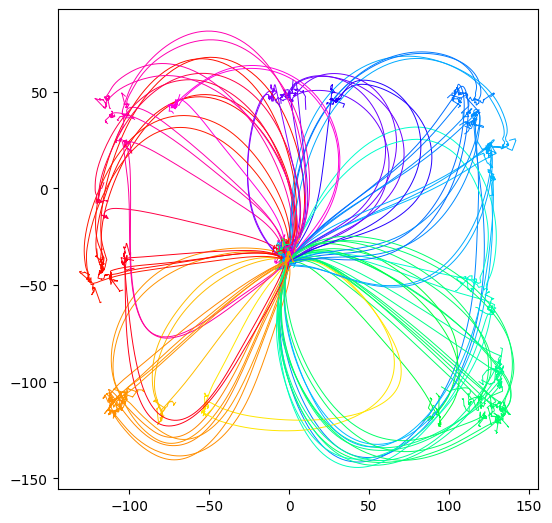

In [12]:
## Plot trial-averaged reaches

# Find unique conditions
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()

counter = 0
# Initialize plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond in conds:
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # print(mask.sum())               # print the number of trials that satisfy the condition
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field = 'move_onset_time', ignored_trials = (~mask))
    # Average hand position across trials
    traj = trial_data.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determing reach ange for color
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    plt.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle/(2*np.pi) + 0.5))
    counter += 1
# print(counter)
# plt.axis('off')
plt.show()

 For each time point, the position of the hand is averaged across all trials of that condition, resulting in a single trajectory that represents the average behavior for that condition

## Plot Hand Trajectory For Each Trial for One Condition

To visualize what each hand trajectory looks like before it is averaged(aligned) for all trials for a condition which was then done for multiple conditions

NaNs found in `self.data`. Dropping 84.96% of points to remove NaNs from `trial_data`.


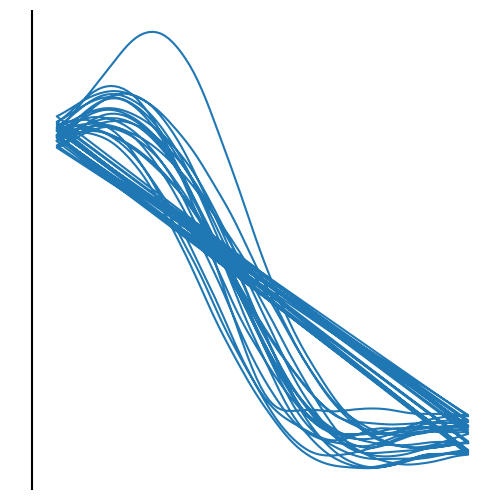

In [61]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

cond_t = (11, 1)
mask_t = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond_t, axis=1)
# print(mask_t.sum())       print to clarify the number of trials that obey this condition
trial_data_t = dataset.make_trial_data(align_field = 'move_onset_time', ignored_trials = (~mask_t))
plt.plot(trial_data_t['align_time'], trial_data_t[('hand_pos', 'x')])
plt.axis('off')
plt.axvline(0,c='k')
plt.show()

In [62]:
trial_data_t

align_time             clock_time  cursor_pos            \
                                                              x         y   
358   0 days 00:00:00.030000 0 days 00:01:05.090000   -2.691204  0.191047   
359   0 days 00:00:00.035000 0 days 00:01:05.095000   -1.785247  0.875340   
360   0 days 00:00:00.040000 0 days 00:01:05.100000   -0.791908  1.595570   
361   0 days 00:00:00.045000 0 days 00:01:05.105000    0.420592  2.980472   
362   0 days 00:00:00.050000 0 days 00:01:05.110000    1.903746  4.686163   
...                      ...                    ...         ...       ...   
13804 0 days 00:00:00.505000 0 days 01:54:48.770000 -118.898019  4.186200   
13805 0 days 00:00:00.510000 0 days 01:54:48.775000 -118.586639  3.387305   
13806 0 days 00:00:00.515000 0 days 01:54:48.780000 -118.193210  2.587770   
13807 0 days 00:00:00.520000 0 days 01:54:48.785000 -117.890081  1.884574   
13808 0 days 00:00:00.525000 0 days 01:54:48.790000 -117.688883  1.389764   

         eye_pos               hand_pos               hand_vel              \
               x          y           x          y           x           y   
358   -79.026027  19.949771   -0.980364 -33.247588  209.906375  220.222753   
359   -79.544231  19.558527    0.160312 -31.996907  246.093807  279.797110   
360   -79.379118  19.642466    1.475238 -30.449000  278.829086  339.269241   
361   -80.008604  20.651856    2.933676 -28.613777  302.389423  392.960716   
362   -77.430854  20.939483    4.481188 -26.535137  314.987362  437.046265   
...          ...        ...         ...        ...         ...         ...   
13804 -96.500900  12.391954 -118.398722 -30.905690   49.905529 -151.723500   
13805 -95.513780  13.225632 -118.151281 -31.617228   49.006246 -133.627033   
13806 -96.805276  12.253717 -117.908146 -32.250661   48.475666 -120.552053   
13807 -96.650773  12.536891 -117.662390 -32.825778   50.453102 -109.593076   
13808 -97.921904  12.137044 -117.398295 -33.348761   55.714892  -99.935395   

       ... spikes_smth_50                                                    \
       ...           2871      2881      2882      2911      2931      2941   
358    ...            0.0  0.015582  0.135309  0.062490  0.039952  0.058274   
359    ...            0.0  0.013634  0.133807  0.055988  0.039952  0.059200   
360    ...            0.0  0.011964  0.131478  0.049709  0.040070  0.059861   
361    ...            0.0  0.010200  0.128337  0.043734  0.039460  0.060258   
362    ...            0.0  0.009215  0.124423  0.038129  0.038537  0.060390   
...    ...            ...       ...       ...       ...       ...       ...   
13804  ...            0.0  0.039952  0.023739  0.000000  0.075302  0.000000   
13805  ...            0.0  0.039554  0.021165  0.000000  0.068838  0.000000   
13806  ...            0.0  0.038771  0.018314  0.000000  0.061999  0.000000   
13807  ...            0.0  0.037625  0.016082  0.000000  0.055751  0.000000   
13808  ...            0.0  0.036150  0.013981  0.000000  0.049675  0.000000   

                          trial_id             trial_time  
           2951      2961                                  
358    0.102914  0.111117       20 0 days 00:00:01.790000  
359    0.100494  0.111672       20 0 days 00:00:01.795000  
360    0.098331  0.112654       20 0 days 00:00:01.800000  
361    0.095947  0.113155       20 0 days 00:00:01.805000  
362    0.093376  0.113513       20 0 days 00:00:01.810000  
...         ...       ...      ...                    ...  
13804  0.076340  0.043426     2274 0 days 00:00:02.470000  
13805  0.074467  0.043033     2274 0 days 00:00:02.475000  
13806  0.072136  0.042125     2274 0 days 00:00:02.480000  
13807  0.069374  0.041613     2274 0 days 00:00:02.485000  
13808  0.066223  0.041035     2274 0 days 00:00:02.490000  

[2100 rows x 379 columns]

## Single-neuron responses



A "PSTH" (peristimulus time histogram) is a common tool used in neuroscience to visualize the temporal pattern of spiking activity of a neuron in response to a particular stimulus or event. It is a histogram of the number of spikes that occur within a small time bin (e.g., 1 ms) relative to the onset of the stimulus or event.

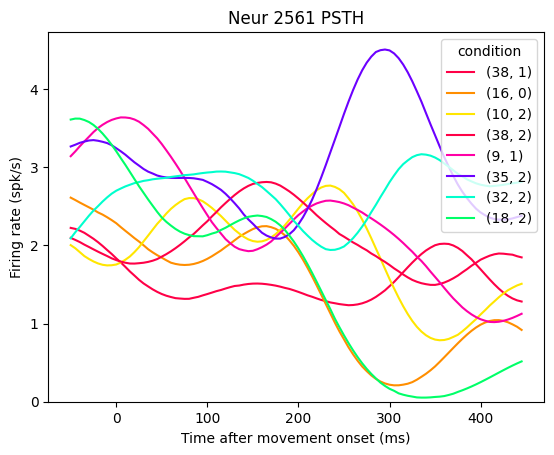

In [16]:
## Plot PSTHs

# Seed generator for consistent plots
np.random.seed(2468)
n_conds = 8 # number of conditions to plot

# Smooth spikes with 50 ms std Gaussian
dataset.smooth_spk(50, name='smth_50')

# Plot random neuron
neur_num = np.random.choice(dataset.data.spikes.columns)
# neur_num = 2951

# Find unique conditions
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()

# Plot random subset of conditions
for i in np.random.choice(len(conds), size=n_conds, replace=False):
    cond = conds[i]
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field='target_on_time', align_range=(-50, 450), ignored_trials=(~mask))
    # Average hand position across trials
    psth = trial_data.groupby('align_time')[[('spikes_smth_50', neur_num)]].mean().to_numpy() / dataset.bin_width * 1000
    # Color PSTHs by reach angle
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    plt.plot(np.arange(-50, 450, dataset.bin_width), psth, label=cond, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))

# Add labels
plt.ylim(bottom=0)
plt.xlabel('Time after movement onset (ms)')
plt.ylabel('Firing rate (spk/s)')
plt.title(f'Neur {neur_num} PSTH')
plt.legend(title='condition', loc='upper right')
plt.show()

According to the template notebook, averaging across trials which was done here discards single trial variability as noise. Why is that bad?

## Decoding Hand Kinematics

In [19]:
# Selecting the lag that gives the best predictions

x1 = -130
x2 = 370
addons = np.arange(-400, 400, 20)
R2 = []

for x in addons:
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(x1, x2))
    lagged_trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(x1+x, x2+x))
    rates = trial_data.spikes_smth_50.to_numpy()
    vel = lagged_trial_data.hand_vel.to_numpy()
    
    gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 0, 5)})
    gscv.fit(rates, vel)
    R2.append(gscv.best_score_)
    
max_R2 = max(R2)
i = R2.index(max_R2)
print(f'{addons[i]} lag ---> Decoding R2: {max_R2}')
plt.plot(addons, R2)
plt.xlabel('Lag (ms)')
plt.ylabel('Decoding R2')
plt.show()

NaNs found in `self.data`. Dropping 32.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 100.00% of points to remove NaNs from `trial_data`.


ValueError: Found input variables with inconsistent numbers of samples: [156060, 0]

In [15]:
trial_data

align_time             clock_time  cursor_pos             \
                                                                 x          y   
0      -1 days +23:59:59.870000 0 days 00:00:01.775000   -1.500630  -7.690102   
1      -1 days +23:59:59.875000 0 days 00:00:01.780000   -1.500783  -7.687811   
2      -1 days +23:59:59.880000 0 days 00:00:01.785000   -1.500987  -7.592063   
3      -1 days +23:59:59.885000 0 days 00:00:01.790000   -1.501183  -7.584069   
4      -1 days +23:59:59.890000 0 days 00:00:01.795000   -1.501459  -7.591929   
...                         ...                    ...         ...        ...   
229495   0 days 00:00:00.345000 0 days 01:55:51.530000 -119.293563 -76.299051   
229496   0 days 00:00:00.350000 0 days 01:55:51.535000 -118.892889 -76.887596   
229497   0 days 00:00:00.355000 0 days 01:55:51.540000 -118.493024 -77.401477   
229498   0 days 00:00:00.360000 0 days 01:55:51.545000 -117.988549 -77.986586   
229499   0 days 00:00:00.365000 0 days 01:55:51.550000 -117.394343 -78.501032   

           eye_pos                hand_pos               hand_vel              \
                 x           y           x           y          x           y   
0        63.471943   12.653111   -1.525304  -42.620331   0.797891    2.169766   
1        92.776705   17.430829   -1.520426  -42.611566   1.039669    0.989714   
2       115.461873   16.810122   -1.515763  -42.613310   0.763505   -1.884226   
3       134.311649   14.908445   -1.513114  -42.630592   0.282314   -4.949530   
4       144.136571   13.463244   -1.512819  -42.661717  -0.132200   -7.255619   
...            ...         ...         ...         ...        ...         ...   
229495 -116.487269 -123.182626 -118.491606 -111.919255  80.212820 -102.449987   
229496 -115.680841 -124.482785 -118.069229 -112.408132  87.483325  -92.542350   
229497 -115.851050 -124.211628 -117.630923 -112.841679  86.033315  -80.785503   
229498 -113.886651 -124.358990 -117.224200 -113.217378  75.218908  -69.805069   
229499 -115.517058 -125.124387 -116.887713 -113.542210  58.785232  -60.334902   

        ... spikes                                    trial_id  \
        ...   2871 2881 2882 2911 2931 2941 2951 2961            
0       ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
1       ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
2       ...    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0        0   
3       ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0        0   
4       ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
...     ...    ...  ...  ...  ...  ...  ...  ...  ...      ...   
229495  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
229496  ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     2294   
229497  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
229498  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2294   
229499  ...    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     2294   

                   trial_time  
                               
0      0 days 00:00:01.775000  
1      0 days 00:00:01.780000  
2      0 days 00:00:01.785000  
3      0 days 00:00:01.790000  
4      0 days 00:00:01.795000  
...                       ...  
229495 0 days 00:00:02.230000  
229496 0 days 00:00:02.235000  
229497 0 days 00:00:02.240000  
229498 0 days 00:00:02.245000  
229499 0 days 00:00:02.250000  

[229500 rows x 195 columns]

In [17]:
## Kinematic decoding

# Extract neural data and lagged hand velocity
trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-130, 370))
lagged_trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-130+160, 370+160))
rates = trial_data.spikes_smth_50.to_numpy()
vel = lagged_trial_data.hand_vel.to_numpy()

# Fit and evaluate decoder
gscv = GridSearchCV(Ridge(), {'alpha': np.logspace(-4, 0, 5)})
gscv.fit(rates, vel)
pred_vel = gscv.predict(rates)
print(f"Decoding R2: {gscv.best_score_}")

# Merge predictions back to continuous data
pred_vel_df = pd.DataFrame(pred_vel, index=lagged_trial_data.clock_time, columns=pd.MultiIndex.from_tuples([('pred_vel', 'x'), ('pred_vel', 'y')]))
dataset.data = pd.concat([dataset.data, pred_vel_df], axis=1)

Decoding R2: 0.6657294424137381


NaNs found in `self.data`. Dropping 16.67% of points to remove NaNs from `trial_data`.


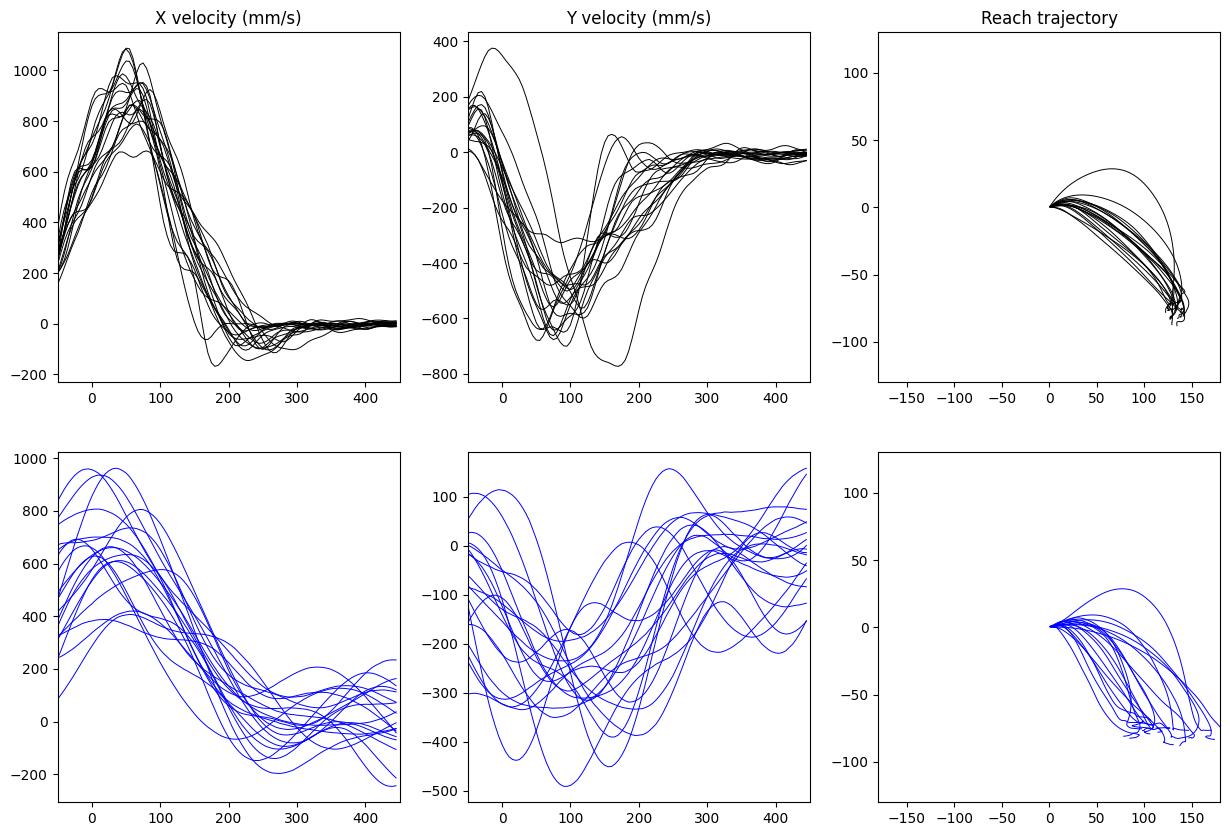

In [18]:
# Plot predicted vs true kinematics

# Choose 23rd condition to plot

cond = conds[23]

# Find trials in condition and extract data
mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis = 1)
trial_data = dataset.make_trial_data(align_field = 'move_onset_time', align_range = (-50, 550), ignored_trials = (~mask))

# Initialized figure
fig, axs = plt.subplots(2, 3)
t = np.arange(-50, 450, dataset.bin_width)

# fig size
fig.set_figheight(10)
fig.set_figwidth(15)

# Loop through trials in condition
for _, trial in trial_data.groupby('trial_id'):
    # True and predicted x velocity
    axs[0][0].plot(t, trial.hand_vel.x, linewidth=0.7, color='black')
    axs[1][0].plot(t, trial.pred_vel.x, linewidth=0.7, color='blue')
    # True and predicted y velocity
    axs[0][1].plot(t, trial.hand_vel.y, linewidth=0.7, color='black')
    axs[1][1].plot(t, trial.pred_vel.y, linewidth=0.7, color='blue')
    # True and predicted trajectories
    true_traj = np.cumsum(trial.hand_vel.to_numpy(), axis=0) * dataset.bin_width / 1000
    pred_traj = np.cumsum(trial.pred_vel.to_numpy(), axis=0) * dataset.bin_width / 1000
    
    axs[0][2].plot(true_traj[:, 0], true_traj[:, 1], linewidth=0.7, color='black')
    axs[1][2].plot(pred_traj[:, 0], true_traj[:, 1], linewidth=0.7, color='blue')
    
# Set up shared axes
for i in range(2):
    axs[i][0].set_xlim(-50, 450)
    axs[i][1].set_xlim(-50, 450)
    axs[i][2].set_xlim(-180, 180)
    axs[i][2].set_ylim(-130, 130)


# Add labels
axs[0][0].set_title('X velocity (mm/s)')
axs[0][1].set_title('Y velocity (mm/s)')
axs[0][2].set_title('Reach trajectory')
plt.show()

!! I don't fully understand the arithmetic going on in calculating the reach trajectories

ANS: To perform integration

## Neural trajectories

NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 16.00% 

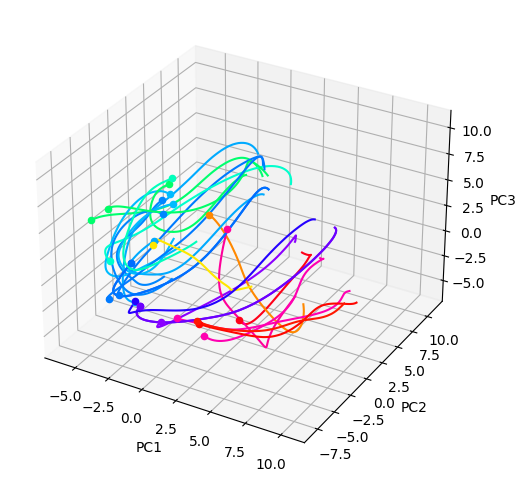

In [63]:
## Plot neural trajectories for subset of conditions

# Seed generator for consistent plots
np.random.seed(2021)
n_conds = 27 # number of conditions to plot

# Get unique conditions
conds = dataset.trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()

# Loop through conditions
rates = []
colors = []
for i in np.random.choice(len(conds), n_conds):
    cond = conds[i]
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
    # Append averaged smoothed spikes for condition
    rates.append(trial_data.groupby('align_time')[trial_data[['spikes_smth_50']].columns].mean().to_numpy())
    # Append reach angle-based color for condition
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    colors.append(plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))

# Stack data and apply PCA
rate_stack = np.vstack(rates)
rate_scaled = StandardScaler().fit_transform(rate_stack)
pca = PCA(n_components=3)
traj_stack = pca.fit_transform(rate_scaled)
traj_arr = traj_stack.reshape((n_conds, len(rates[0]), -1))

# Loop through trajectories and plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for traj, col in zip(traj_arr, colors):
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], color=col)
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], color=col) 

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [35]:
# searching for an interesting neuron

np.argsort(np.abs(pca.components_[0])) # neurons from the least to the most important for the PC 1

array([122,  68,  74,  17,  44, 111,  12,   0, 115, 127,  92, 171, 145,
        69, 180,  29,  62,  88,  84, 152,  80, 134, 168, 107, 158,  50,
       174,  87,  25, 137, 131, 143,  52,  47,  46,  61,  48, 141, 167,
        42,  85, 154, 150, 179,  89, 172,  60, 106,  79, 170, 112, 157,
        81,  72, 144,  28, 117, 178, 139,  83,  65, 166,  16, 155, 129,
       156, 119, 162, 147, 176, 148, 177, 130,  35, 113, 121,  99, 163,
       165, 159,   9, 160,  70, 108,  97, 125, 153,  86,  36,  98, 110,
       149,  53,  27,  94,  39,  57,  33,  10, 135,  91, 116, 169,  38,
        55, 120,  21,  20,  45,   7,  75, 109,  95, 151, 128, 100,   1,
       105,  30,  49, 138, 142,  64,   3,  41, 140,  56, 114, 123, 133,
        90,  31,  32,  93,  51,  14, 181,  63,  13,  71, 161,  96, 101,
       146,  67,   6,  24,  15,   5,  66,  23,  82, 173,  73, 126,   8,
        18, 102, 124, 118,  77,  37,  59,  26,  22,  19,   4,  76, 103,
         2, 164,  78,  43,  40, 104, 132, 136, 175,  11,  34,  5

Create a matrix of spikes with trials against time bins

In [36]:
np.unique(dataset.trial_info['trial_type'])

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39], dtype=int64)

NaNs found in `self.data`. Dropping 16.67% of points to remove NaNs from `trial_data`.


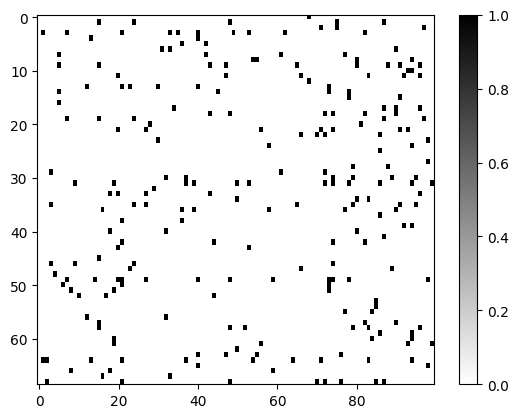

In [29]:
# dataset.resample(5)

# select 1 neuron
neuron = 2951

# time bins
t = np.arange(-50, 450, dataset.bin_width)


# select 1 condition
cond = conds[3]

# find trial data
mask = np.all(dataset.trial_info[['trial_type']] == 3 , axis=1)

# create matrix
matrix = np.zeros((mask.sum(), len(t)))

# extract trial data
trial_data = dataset.make_trial_data(align_field = 'move_onset_time', align_range=(-50, 550), ignored_trials=(~mask))

trial_ids = np.unique(trial_data['trial_id'])
# print(trial_ids)

for i, trial in enumerate(trial_ids):
    # trial_data[trial_data['trial_id'] == 3][('spikes', neuron)]
    # print(i, trial)
    matrix[i] = trial_data[trial_data['trial_id'] == trial]['spikes'].to_numpy()[:,133]
    # print(matrix[i].shape)
    # matrix[i] = trial_data[trial_data['trial_id'] == trial][('spikes', neuron)].to_numpy()


plt.imshow(matrix, aspect='auto', cmap='gray_r', interpolation='none')
plt.colorbar()
plt.show()

### Tuning curves

In [51]:
from scipy.ndimage import gaussian_filter1d

NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% of points to remove NaNs from `trial_data`.
NaNs found in `self.data`. Dropping 57.50% 

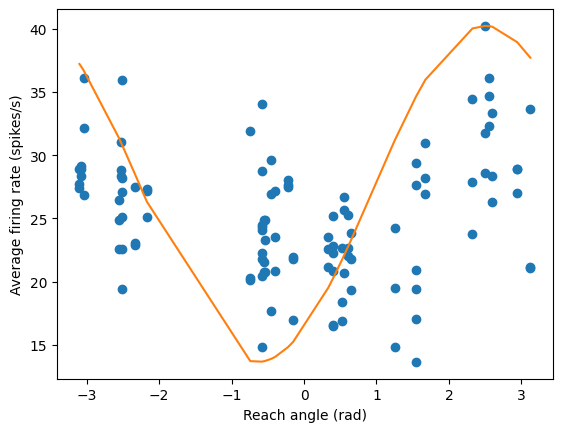

In [59]:
# Plot tuning curve for a single neuron

window = 100

avg_res = []
reach_ang = []

# cond = conds[8]
neu_id = 2951

for cond in conds:

    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1) 
    trial_data = dataset.make_trial_data(align_field = 'move_onset_time', align_range=(-200, 200), ignored_trials=(~mask))

    # average firing rate (sum of spikes/trials * window)
    avg_fr = np.mean(trial_data.groupby('align_time')[[('spikes', neur_num)]].mean().to_numpy() / dataset.bin_width * 1000)
    
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    
    avg_res.append(avg_fr)
    reach_ang.append(reach_angle)
    
avg_res = np.array(avg_res)
reach_ang = np.array(reach_ang)

max_res = np.max(avg_res)
min_res = np.min(avg_res)
max_res_id = np.argmax(avg_res)

reach_ang_alpha_0 = reach_ang[max_res_id]

sorted_aphas = np.sort(reach_ang)
y = (1+np.cos(sorted_aphas - reach_ang_alpha_0)) * (max_res - min_res)/2 + min_res

plt.plot(reach_ang, avg_res, 'o')
plt.plot(sorted_aphas,y)
plt.xlabel('Reach angle (rad)')
plt.ylabel('Average firing rate (spikes/s)')
# plot smooth tuning curve
# plt.plot(np.linspace(-np.pi, np.pi, 100), gaussian_filter1d(avg_res, 1), color='black', linewidth=0.7)


plt.show()

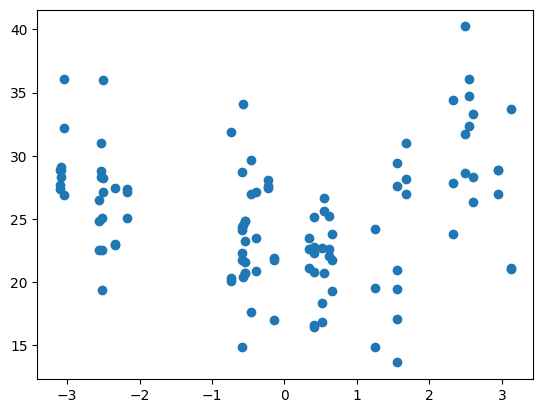

In [57]:
plt.plot(reach_ang, avg_res, 'o')

In [45]:
trial_data

align_time             clock_time cursor_pos             \
                                                            x          y   
46   0 days 00:00:00.030000 0 days 00:00:27.965000  -3.205706  -0.582422   
47   0 days 00:00:00.035000 0 days 00:00:27.970000  -2.528676  -0.593215   
48   0 days 00:00:00.040000 0 days 00:00:27.975000  -1.897975  -0.583168   
49   0 days 00:00:00.045000 0 days 00:00:27.980000  -0.933608  -0.391054   
50   0 days 00:00:00.050000 0 days 00:00:27.985000   0.104031  -0.186880   
...                     ...                    ...        ...        ...   
1515 0 days 00:00:00.175000 0 days 01:55:44.890000  63.989828 -40.598232   
1516 0 days 00:00:00.180000 0 days 01:55:44.895000  66.599234 -43.089425   
1517 0 days 00:00:00.185000 0 days 01:55:44.900000  69.189699 -45.397814   
1518 0 days 00:00:00.190000 0 days 01:55:44.905000  71.703351 -47.694521   
1519 0 days 00:00:00.195000 0 days 01:55:44.910000  74.085533 -49.892896   

        eye_pos              hand_pos               hand_vel              ...  \
              x          y          x          y           x           y  ...   
46    23.355835 -38.614204  -2.061855 -35.565745  152.164334   25.868281  ...   
47    30.167895 -51.177977  -1.244308 -35.412754  175.570488   35.156493  ...   
48    35.406131 -60.513489  -0.298178 -35.217828  204.136805   41.919257  ...   
49    42.944135 -70.874058   0.811512 -35.007311  241.287949   40.435076  ...   
50    51.710282 -80.455067   2.121711 -34.827296  282.858450   30.281117  ...   
...         ...        ...        ...        ...         ...         ...  ...   
1515  21.364326 -60.722439  66.066147 -77.514730  509.021359 -463.292490  ...   
1516  21.193046 -59.607778  68.600359 -79.817986  504.872572 -458.489728  ...   
1517  22.475523 -59.362431  71.114185 -82.100859  500.355315 -454.473611  ...   
1518  23.160962 -60.124648  73.599557 -84.359106  492.989700 -448.135388  ...   
1519  22.686948 -59.533094  76.032358 -86.570810  478.426633 -434.647202  ...   

     spikes_smth_50                                                    \
               2871      2881      2882      2911      2931      2941   
46              0.0  0.015175  0.029711  0.036150  0.060448  0.003872   
47              0.0  0.012945  0.027566  0.037625  0.060760  0.004481   
48              0.0  0.010943  0.026023  0.038771  0.061102  0.004892   
49              0.0  0.009167  0.025061  0.039554  0.061440  0.005976   
50              0.0  0.007226  0.024647  0.039952  0.061740  0.007226   
...             ...       ...       ...       ...       ...       ...   
1515            0.0  0.050949  0.010254  0.001194  0.068709  0.108191   
1516            0.0  0.055747  0.008651  0.000912  0.072208  0.108132   
1517            0.0  0.060390  0.007226  0.000689  0.076290  0.107750   
1518            0.0  0.064769  0.005976  0.000516  0.080861  0.106991   
1519            0.0  0.068774  0.004892  0.000000  0.085800  0.105422   

                         trial_id             trial_time  
          2951      2961                                  
46    0.331321  0.053934        8 0 days 00:00:02.165000  
47    0.333056  0.058374        8 0 days 00:00:02.170000  
48    0.333774  0.062260        8 0 days 00:00:02.175000  
49    0.333891  0.066345        8 0 days 00:00:02.180000  
50    0.332097  0.070010        8 0 days 00:00:02.185000  
...        ...       ...      ...                    ...  
1515  0.110639  0.071200     2292 0 days 00:00:02.090000  
1516  0.109540  0.076495     2292 0 days 00:00:02.095000  
1517  0.108305  0.081819     2292 0 days 00:00:02.100000  
1518  0.107265  0.086730     2292 0 days 00:00:02.105000  
1519  0.105902  0.092037     2292 0 days 00:00:02.110000  

[646 rows x 379 columns]